Task 1: titanic survival prediction

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_data = pd.read_csv('/content/Titanic-Dataset.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age and cabin has null values or blank

In [16]:
#we will fill blank with median value
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

/tmp/ipython-input-16-463975234.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)


In [18]:
#count the embarked
titanic_data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [19]:
#replace blanks with mode value
titanic_data['Embarked'].fillna('S', inplace=True)

In [20]:
#check null values in data
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
#in fare column has also null value replace with median
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

/tmp/ipython-input-21-1397701523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)


In [22]:
#we will remove the 'cabin' column because it contain a significant number of missing values
titanic_data.drop(columns='Cabin', inplace=True)

In [23]:
#last check null value and dataset
print(titanic_data.isnull().sum())
print(titanic_data.head())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599

Now data is cleaned

Exploratory data analysis



survival variable describe as
0= No, 1= yes

In [24]:
import seaborn as sns

In [25]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

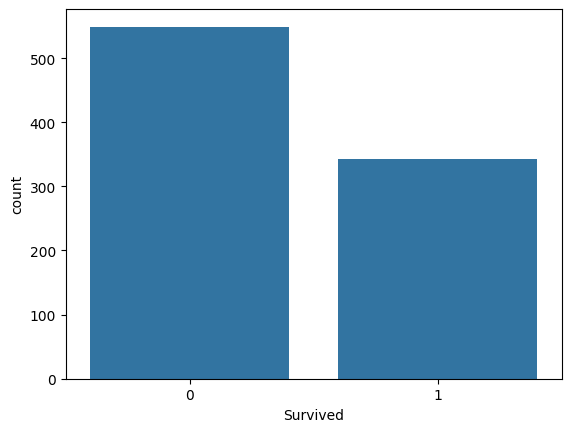

In [26]:
sns.countplot(data=titanic_data, x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

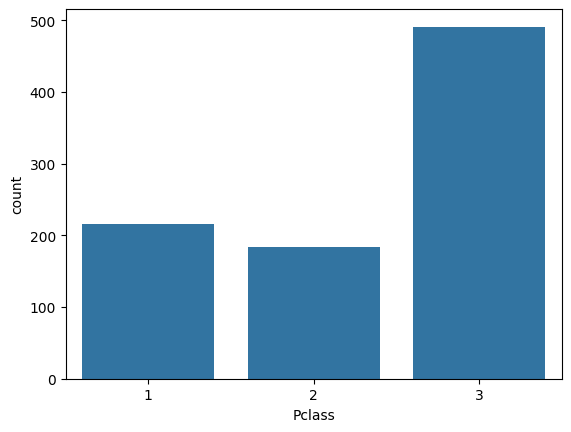

In [27]:
sns.countplot(data=titanic_data, x='Pclass')

<Axes: xlabel='Sex', ylabel='count'>

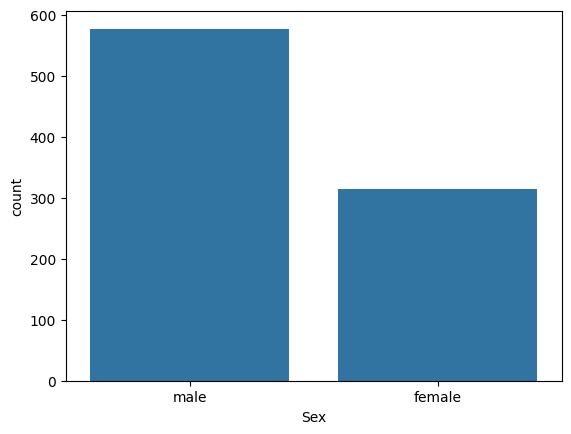

In [28]:
sns.countplot(data=titanic_data, x='Sex')

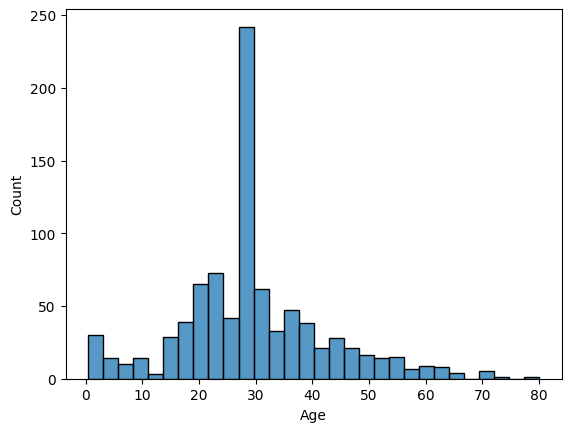

In [33]:
sns.histplot(data=titanic_data, x='Age')
plt.show()

#show counts of survival wrt pclass

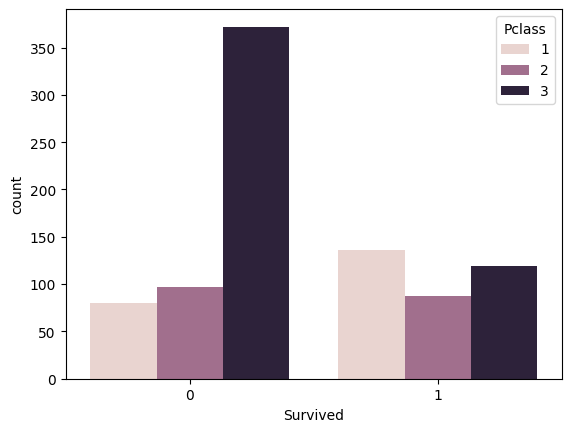

In [34]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Pclass'])
plt.show()

#show count of survival wrt gender

In [35]:
titanic_data['Sex'].head()

,Sex
0,male
1,female
2,female
3,female
4,male


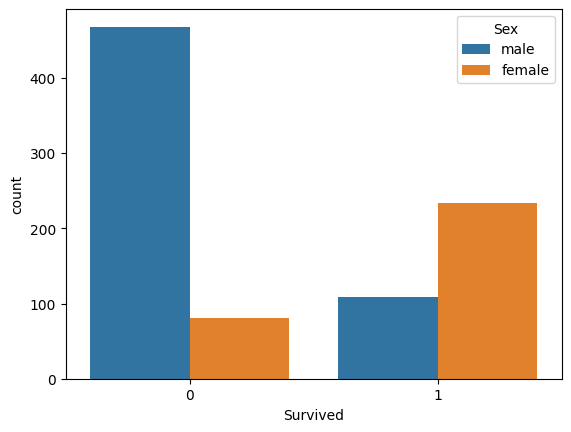

In [36]:
sns.countplot(x=titanic_data['Survived'], hue=titanic_data['Sex'])
plt.show()

show survival wrt age

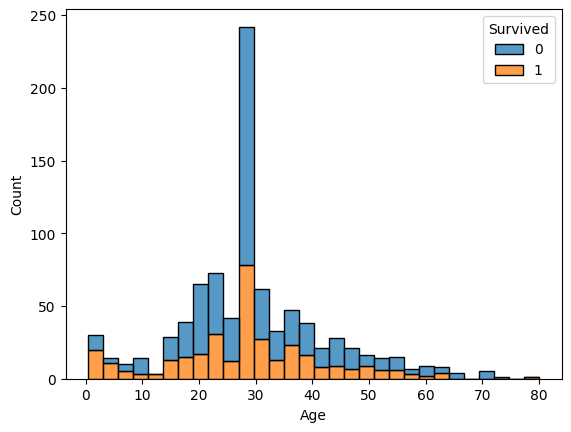

In [42]:
sns.hisplot(x=titanic_data['Age'], hue=titanic_data['Survived'], multiple='stack')
plt.show()

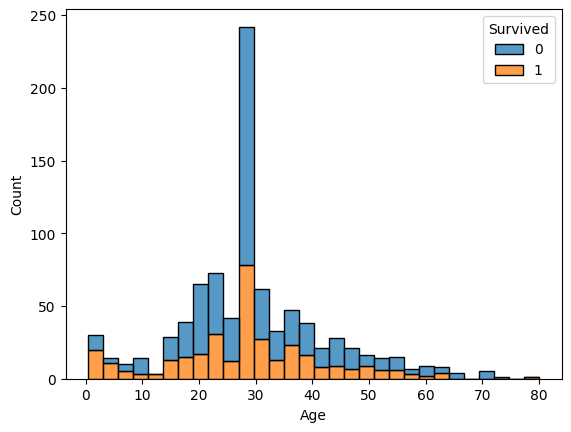

In [45]:
sns.histplot(x=titanic_data['Age'], hue=titanic_data['Survived'], multiple='stack')
plt.show()

featuring engineering

use labelencoder from sklearn library

# Task
Explain the error in the provided Python code for Titanic survival prediction, fix it, and incorporate the changes. If fixing is not possible, diagnose the error. The code should include data loading, preprocessing (handling missing values, feature engineering, encoding), model training, and evaluation.

## Feature engineering

### Subtask:
Create new features from existing ones that might be more informative for the model (e.g., combining 'SibSp' and 'Parch' into a 'FamilySize' feature).


**Reasoning**:
Create 'FamilySize' and 'IsAlone' features and display the updated dataframe.



In [52]:
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data['IsAlone'] = 0
titanic_data.loc[titanic_data['FamilySize'] == 0, 'IsAlone'] = 1
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1


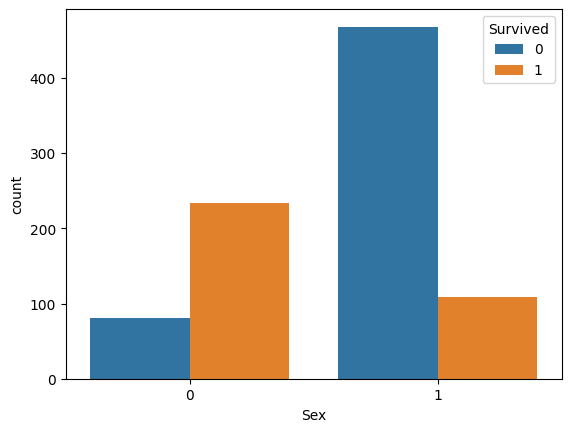

In [58]:
sns.countplot(x=titanic_data['Sex'],hue=titanic_data['Survived'])
plt.show()

drop unneccasey column for modeling

**Reasoning**:
Split the data into training and testing sets using `train_test_split`.

In [71]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 6)
X_test shape: (179, 6)
y_train shape: (712,)
y_test shape: (179,)


## Model Training

### Subtask:
Select a suitable machine learning model and train it on the prepared data.

**Reasoning**:
Train a Logistic Regression model on the training data.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

In [73]:
titanic_data.head()

,Survived,Pclass,Sex,FamilySize,IsAlone,Embarked_Q,Embarked_S
0,0,3,1,1,0,False,True
1,1,1,0,1,0,False,False
2,1,3,0,0,1,False,True
3,1,1,0,1,0,False,True
4,0,3,1,0,1,False,True


Modeling

In [74]:
X=titanic_data[['Sex', 'Pclass']]
Y=titanic_data['Survived']

split data into test and train by using sklearn library

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,Y_test =train_test_split(X,Y,test_size=0.2, random_state=0)

create training model

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
log = LogisticRegression(random_state = 0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

create predicton model

In [78]:
pred = log.predict(X_test)
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [79]:
print("Accuracy_score :", accuracy_score(Y_test,pred))
print("Matrix :", confusion_matrix(Y_test,pred))

Accuracy_score : 0.7877094972067039
Matrix : [[92 18]
 [20 49]]


In [80]:
Y_test

,Survived
495,0
648,0
278,0
31,1
255,1
...,...
780,1
837,0
215,1
833,0


In [81]:
submission=X.iloc[:,:].values
y_final=log.predict(submission)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [82]:
y_final.shape

(891,)

In [84]:
final = pd.DataFrame()
final["Sex"]= X["Sex"]
final["survived"]=y_final

In [85]:
final.to_csv("submission.csv",index=False)

training is completed , now check

predict([[Pclass, Sex]]) => survived or not survived

In [86]:
import warnings
warnings.filterwarnings("ignore")

result = log.predict([[5,0]])
if(result == 0):
  print("So sorry , Not Survived")
else:
  print("Survived")


So sorry , Not Survived
